In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [3]:
df=pd.read_csv('/content/twitter_validation.csv',sep=",",header=None,encoding="ISO-8859-1") # encoding is passed to read emojis
df.columns=['id','Platform','review_type','review']
df

,id,Platform,review_type,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
df.head()

,id,Platform,review_type,review
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
df.tail()

,id,Platform,review_type,review
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [6]:
df.isna().sum()

,0
id,0
Platform,0
review_type,0
review,0


In [7]:
df.dtypes

,0
id,int64
Platform,object
review_type,object
review,object


<Axes: xlabel='count', ylabel='Platform'>

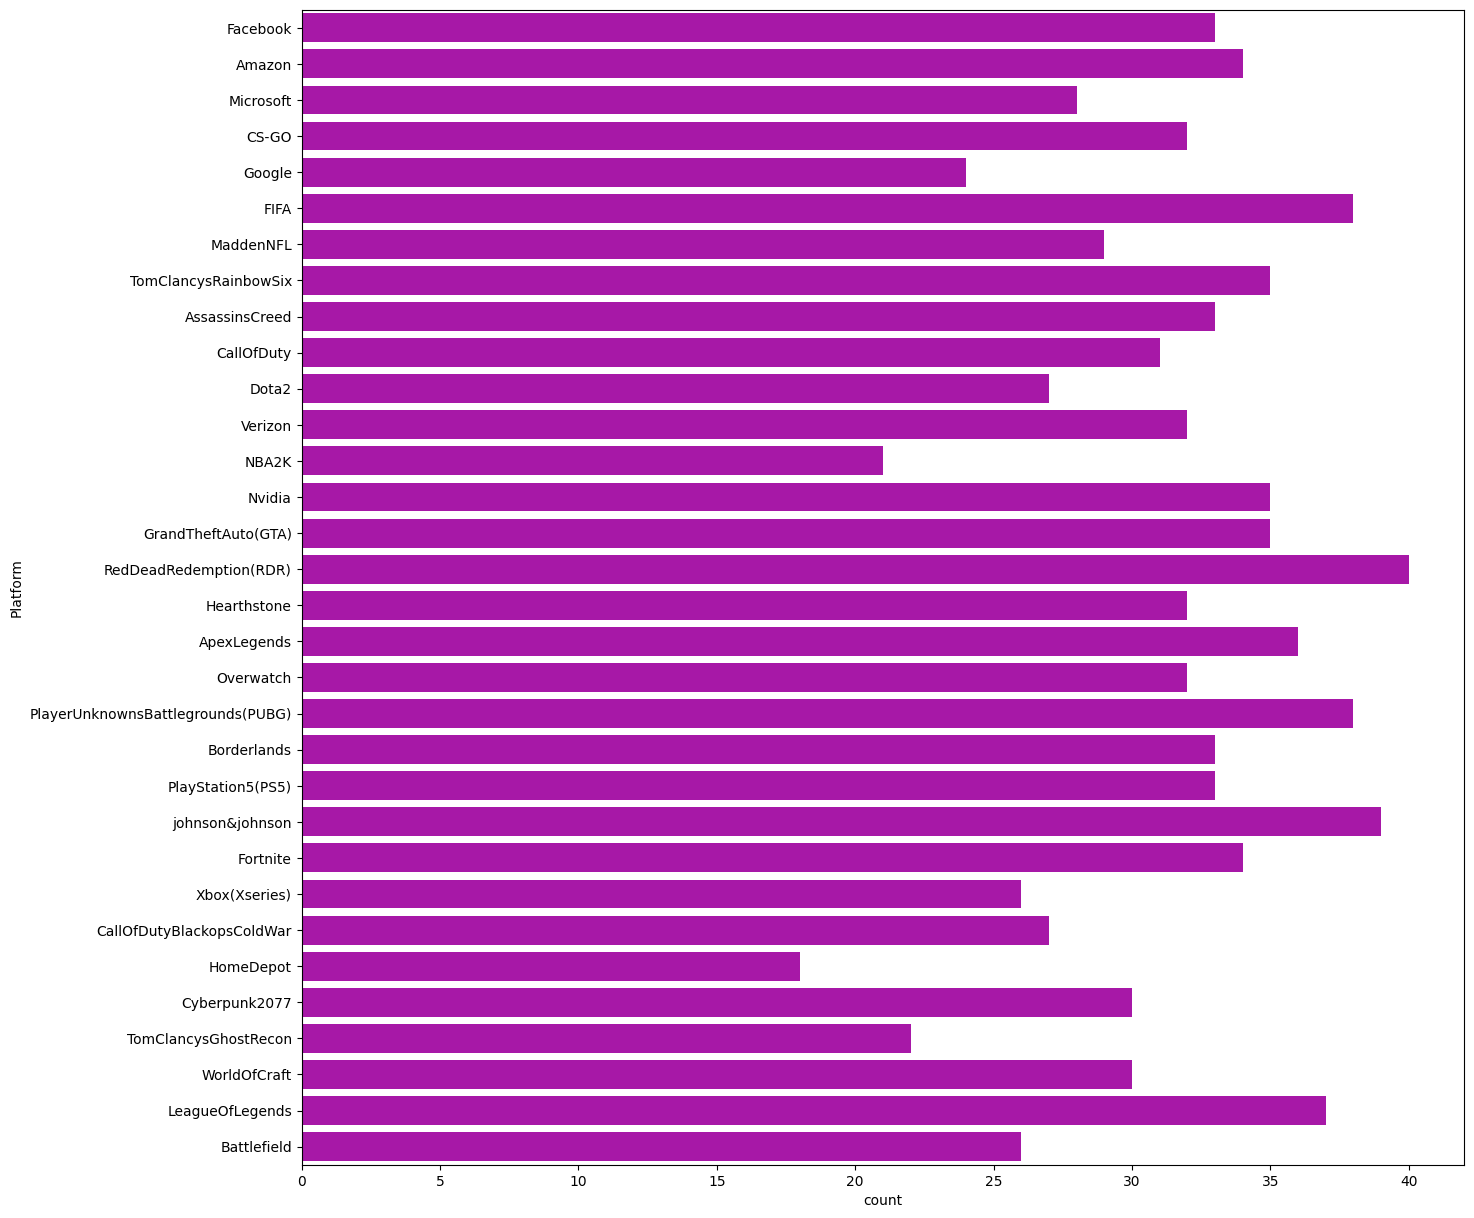

In [8]:
plt.figure(figsize=(15,15))
sns.countplot(df['Platform'],color='m')
# sns.countplot(x=df['Platform'],data=df,color='m')

<Axes: xlabel='review_type', ylabel='count'>

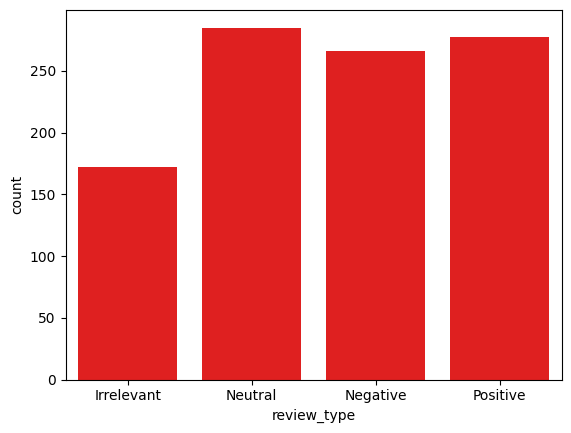

In [9]:
sns.countplot(x=df['review_type'],data=df,color='r')

In [10]:
# To delete the row irrelevant, bcz there is no need of that column irrelevant we only need positive,negative and neutral
df.drop(df.index[(df['review_type']=='Irrelevant')],axis=0,inplace=True) # here index is not reseted
df

,id,Platform,review_type,review
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [11]:
df.reset_index(drop=True,inplace=True) # or can use ignore_index=True
df

,id,Platform,review_type,review
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
df.drop(['id','Platform'],axis=1,inplace=True)
df.head()

,review_type,review
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [13]:
# review_type
# positive -> 1
# negative -> -1
# neutral -> 0
df['review_type'] = df['review_type'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0}).astype(int)
df.head()

,review_type,review
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...


In [14]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
tweets=df.review
tweets

,review
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,"CSGO matchmaking is so full of closet hacking,..."
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...
823,Please explain how this is possible! How can t...
824,Good on Sony. As much as I want to see the new...
825,Today sucked so itâs time to drink wine n pl...
826,Bought a fraction of Microsoft today. Small wins.


In [16]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
# tweets=tweets.apply(lambda x:tk.tokenize(x))
# tweets # comma seperated word lists of each review
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x: " ".join(x)) # the previous output tokens are seperated by commas, but we dont want commas(it should be removed again so) to seperate we need space
tweets  # space seperated o/p

,review
0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,@Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi @EAHelp Iâ   ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible ! How can ...
824,Good on Sony . As much as I want to see the ne...
825,Today sucked so itâ   s time to drink wine n...
826,Bought a fraction of Microsoft today . Small w...


In [17]:
# Removing Special charcters
tweets=tweets.str.replace('[^A-Za-z0-9]',' ',regex=True)
tweets

,review
0,BBC News Amazon boss Jeff Bezos rejects clai...
1,Microsoft Why do I pay for WORD when it funct...
2,CSGO matchmaking is so full of closet hacking ...
3,Now the President is slapping Americans in the...
4,Hi EAHelp I ve had Madeleine McCann in m...
...,...
823,Please explain how this is possible How can ...
824,Good on Sony As much as I want to see the ne...
825,Today sucked so it s time to drink wine n...
826,Bought a fraction of Microsoft today Small w...


In [18]:
# a word should be a meaningfull one if it contains atleast 3 characters
# remove those words which has character < 3 words
from nltk.tokenize import TweetTokenizer
tweets=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w) >= 3]))
tweets

,review
0,BBC News Amazon boss Jeff Bezos rejects claims...
1,Microsoft Why pay for WORD when functions poor...
2,CSGO matchmaking full closet hacking truly awf...
3,Now the President slapping Americans the face ...
4,EAHelp had Madeleine McCann cellar for the pas...
...,...
823,Please explain how this possible How can they ...
824,Good Sony much want see the new PS5 what going...
825,Today sucked time drink wine play borderlands ...
826,Bought fraction Microsoft today Small wins


In [19]:
# stemming
# convert into lowercase
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets = tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

,review
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay for word when function poor ...
2,csgo matchmak full closet hack truli aw game
3,now the presid slap american the face that rea...
4,eahelp had madelein mccann cellar for the past...
...,...
823,pleas explain how this possibl how can they le...
824,good soni much want see the new ps5 what go ri...
825,today suck time drink wine play borderland unt...
826,bought fraction microsoft today small win


In [20]:
# removing stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

,review
0,bbc news amazon boss jeff bezo reject claim co...
1,microsoft whi pay word function poor samsungus...
2,csgo matchmak full closet hack truli aw game
3,presid slap american face realli commit unlaw ...
4,eahelp madelein mccann cellar past year littl ...
...,...
823,pleas explain possibl let compani overcharg sc...
824,good soni much want see new ps5 go right much ...
825,today suck time drink wine play borderland sun...
826,bought fraction microsoft today small win


In [21]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data # columns get increased bcz each word act as new column

<828x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 10461 stored elements in Compressed Sparse Row format>

In [22]:
#printing some random values
print(data)  # 0th row 515 column value

  (0, 515)	0.49155204783978756
  (0, 2267)	0.38864111655856126
  (0, 353)	0.1515362387424402
  (0, 610)	0.22681557001542715
  (0, 1813)	0.24577602391989378
  (0, 545)	0.2608257828483461
  (0, 2741)	0.2608257828483461
  (0, 785)	0.21432663830218204
  (0, 838)	0.17354914655342313
  (0, 286)	0.22681557001542715
  (0, 1976)	0.13277165480466424
  (0, 1108)	0.23509805002803952
  (0, 982)	0.2608257828483461
  (0, 668)	0.2608257828483461
  (1, 2135)	0.24555654927912696
  (1, 3619)	0.26216072802580975
  (1, 2442)	0.3126902562590763
  (1, 3659)	0.36557591217188057
  (1, 1383)	0.4055823664694651
  (1, 2538)	0.3821800909185634
  (1, 2871)	0.4055823664694651
  (1, 775)	0.4055823664694651
  (2, 934)	0.3041178383627944
  (2, 2085)	0.3963165794888645
  (2, 1380)	0.3790982275064499
  :	:
  (825, 3363)	0.2560582225152133
  (825, 3373)	0.3395996844494918
  (825, 826)	0.2506921490798916
  (825, 1587)	0.2806965020161681
  (825, 3633)	0.35502404277063115
  (825, 1100)	0.37676345482672335
  (825, 3215)	0.376

In [23]:
data.shape # input

(828, 3763)

In [25]:
y=df['review_type'].values #output
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [26]:
#there is no need to normalise bcz values are already small
# training and testing data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<579x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 7222 stored elements in Compressed Sparse Row format>

In [27]:
x_test

<249x3763 sparse matrix of type '<class 'numpy.float64'>'
	with 3239 stored elements in Compressed Sparse Row format>

In [28]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

In [29]:
y_test

array([ 1,  1,  1,  0, -1, -1, -1,  1, -1, -1, -1, -1,  0,  1, -1,  0,  0,
        1, -1,  1,  0, -1,  0,  1,  0,  1,  1, -1,  0,  1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  0,  1,  0,  1,  0, -1, -1, -1, -1,
        1, -1,  0,  1,  1, -1, -1,  1, -1,  1,  1, -1,  0,  1,  1,  0,  0,
       -1, -1,  1,  1,  0,  1,  0,  0, -1, -1,  1,  0,  1,  1, -1,  1,  0,
        1,  0,  1, -1,  1, -1,  1, -1, -1,  0,  0,  1,  0, -1, -1,  0,  1,
        0,  1,  1, -1,  1,  1,  0,  1,  0,  1, -1,  0,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  0,  0, -1,  0,  0,  0,  1, -1,  1,  0, -1,  1,
        1,  1, -1,  1,  0,  1,  0,  1, -1,  0, -1,  0,  0, -1,  1,  1,  0,
       -1,  0,  0,  1,  1, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  1,  0, -1,  1,  1,  0,  0, -1,  1,  1,
        0,  0, -1,  1,  1,  1,  1,  1, -1,  0,  1,  1, -1,  0, -1,  1,  1,
       -1, -1,  0, -1,  1, -1, -1,  1,  0,  1,  1,  0, -1,  0,  0,  0,  0,
        0, -1, -1,  0,  0

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([-1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        0, -1, -1, -1,  0,  0,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1, -1,  1,  0,  1, -1,  1,  1,  0, -1, -1, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0,  1, -1,  0,  0, -1,  0,  1,  0,
       -1, -1, -1,  0, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,  0,
        0,  0, -1, -1,  1, -1,  0, -1,  0, -1,  1, -1,  1, -1, -1,  1, -1,
       -1,  0,  1, -1,  0,  0,  1, -1, -1,  0, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1, -1,  1,
       -1, -1,  0,  1,  0, -1,  0, -1,  0, -1,  1,  1,  0,  0, -1,  0,  0,
        1,  1,  0,  0,  1, -1, -1,  1,  0, -1,  1, -1,  0,  0, -1,  1, -1,
       -1, -1,  1, -1,  0, -1,  1, -1, -1,  0,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  0,  1, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1

In [34]:
from sklearn.naive_bayes import MultinomialNB
mul=MultinomialNB()
mul.fit(x_train,y_train)
y_pred=mul.predict(x_test)
y_pred

array([ 1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  0,  1, -1, -1, -1,
        0, -1,  1, -1,  0,  0,  1,  0,  1,  1, -1, -1,  1,  0,  1, -1,  1,
        1, -1,  0, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  1,  0,  1,  0,
       -1,  1,  1,  0,  0,  1,  1, -1,  0, -1,  1,  1, -1, -1,  1, -1,  0,
        1,  0,  1,  0,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  1, -1,
        1,  0,  1, -1,  1,  0,  0,  1,  1,  0,  1,  0,  1, -1,  0, -1, -1,
        0,  0,  1,  1,  0,  1,  1, -1, -1,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  1,  1, -1,  0,  0,
       -1, -1,  0,  1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,
       -1,  1,  0,  0,  0, -1, -1,  1,  0, -1,  1,  1,  0,  0, -1,  0,  1,
        1,  0,  0,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  0,  1,  1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  1, -1, -1,  0, -1,  0, -1,
        0, -1, -1,  1,  1

In [35]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred

array([-1,  0,  1,  0, -1, -1, -1,  0, -1,  0,  0,  1,  0,  1, -1, -1, -1,
        0, -1, -1,  0,  0,  0,  1,  0,  1,  1, -1, -1,  0,  0,  1, -1,  1,
        1, -1,  0, -1,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,
       -1, -1,  0,  0,  0, -1, -1,  0,  0,  1, -1,  0,  0,  1,  0,  0,  0,
       -1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0, -1, -1, -1,  0,
        1,  0,  1,  0,  1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  1, -1,  0,  0,  0,  1,  1,  0,  0,  0,  1, -1,  0,  0, -1,
        0,  0,  0,  1,  0,  1,  1, -1, -1,  0, -1,  1,  0,  1,  0,  1,  1,
        0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,
       -1, -1,  0,  1,  0,  0,  0, -1,  0, -1,  0,  1,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1, -1,  1,  0, -1,  1,  0,  0,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  1,  1, -1, -1,  0,  0, -1, -1,  1,  0,  1,  1,
       -1,  0,  0,  0,  1, -1,  0,  0,  0,  1,  1,  0, -1,  0, -1,  0,  0,
        0, -1, -1,  0,  0

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lst=[knn,mul,svc]


In [37]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Model is : ",i)
  print(y_pred)
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy Score : ")
  print(accuracy_score(y_test,y_pred))
  print("Classifiacation Report : ")
  print(classification_report(y_test,y_pred))
  print("*"*100)

Model is :  KNeighborsClassifier(n_neighbors=7)
[-1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  0 -1 -1 -1  0  0  1
 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  0  1 -1  1  1  0
 -1 -1 -1 -1 -1 -1  0  0  1 -1  0  0  1 -1  0  0 -1  0  1  0 -1 -1 -1  0
 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  0 -1 -1  1  1 -1 -1 -1 -1 -1  0  0
 -1  0  0 -1 -1  0  0  0 -1 -1  1  0  0 -1  0 -1  1 -1  1 -1 -1  1 -1 -1
  0  1 -1  0  0  1 -1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  0 -1  0  0
  0  1  0  0  1  1 -1 -1  1 -1 -1 -1  1  0 -1  0 -1  0 -1  1  1  0  0 -1
  0  0  1  1  0  0  1 -1 -1  1  0 -1  1 -1  0  0 -1  1 -1 -1 -1  1 -1  0
 -1  1 -1 -1  0  1 -1 -1 -1 -1  1 -1 -1 -1 -1  0  1 -1 -1  0  0 -1  1 -1
 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1  0  0 -1  0 -1 -1 -1  0 -1  1  1 -1
  0 -1  1 -1 -1 -1 -1 -1  1]
Confusion Matrix : 
[[57 13  9]
 [36 30 13]
 [46 16 29]]
Accuracy Score : 
0.46586345381526106
Classifiacation Report : 
              precision    recall  f1-score   support

          -1     